In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
df_train = pd.read_csv("紅酒.csv")
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.103306,-0.332419,-1.396739,0.450049,-4.920401,2.867882,3.861490,-0.002222,1.232956,-0.801405,0.300482,5
1,1.116875,-0.124623,-1.396739,0.572939,-4.140122,4.102521,4.686835,-0.003247,1.143688,-0.476630,0.300504,5
2,1.116875,-0.259922,-1.275181,0.530233,-4.325636,3.317116,4.421290,-0.003042,1.161641,-0.546246,0.300504,5
3,1.198255,-0.997735,-0.376889,0.450049,-4.963593,3.504207,4.550629,-0.002018,1.131525,-0.737642,0.300504,6
4,1.103306,-0.332419,-1.396739,0.450049,-4.920401,2.867882,3.861490,-0.002222,1.232956,-0.801405,0.300482,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.054038,-0.462056,-1.170759,0.473382,-4.391441,4.503448,4.171856,-0.005221,1.216328,-0.737642,0.300535,5
1595,1.039149,-0.531779,-1.123113,0.513157,-5.614127,4.835265,4.351412,-0.004991,1.235698,-0.318618,0.300559,6
1596,1.058737,-0.590351,-1.056095,0.530233,-4.920401,4.341848,4.056652,-0.004344,1.207903,-0.336470,0.300553,6
1597,1.039149,-0.402230,-1.077897,0.473382,-4.963593,4.503448,4.171856,-0.004625,1.249293,-0.413072,0.300523,5


In [3]:
# normalize 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train1 = scaler.fit_transform(df_train)
df_train2 = pd.DataFrame(df_train1,columns=df_train.columns)
df_train2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4
1,0.527786,0.675673,0.000000,0.739835,0.739956,0.692260,0.599486,0.509766,0.408847,0.628770,0.471164,0.4
2,0.527786,0.605634,0.081350,0.693719,0.726509,0.559731,0.542857,0.524437,0.457662,0.602052,0.471164,0.4
3,0.795601,0.223701,0.682516,0.607134,0.680266,0.591301,0.570440,0.597389,0.375778,0.528593,0.471164,0.6
4,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.320997,0.500999,0.151233,0.632329,0.721739,0.759913,0.489664,0.369038,0.606355,0.528593,0.615399,0.4
1595,0.271999,0.464905,0.183119,0.675281,0.633112,0.815904,0.527955,0.385459,0.659023,0.689416,0.723424,0.6
1596,0.336461,0.434586,0.227969,0.693719,0.683397,0.732644,0.465096,0.431558,0.583446,0.682565,0.695559,0.6
1597,0.271999,0.531968,0.213379,0.632329,0.680266,0.759913,0.489664,0.411515,0.695986,0.653164,0.558801,0.4


## K_means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_train2)
y_kmeans = kmeans.predict(df_train2)

In [5]:
import time
tStart = time.time()  # 計時開始
print('開始')
kmeans_fit = KMeans(n_clusters = 3, random_state=3).fit(df_train2)
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
分群結果：
[0 0 0 ... 0 0 2]
---
It cost 0.071809 sec
0.0718088150024414
結束


In [6]:
len(cluster_labels)

1599

In [7]:
k_means = df_train2
k_means["Cluster"] = cluster_labels
k_means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,0
1,0.527786,0.675673,0.000000,0.739835,0.739956,0.692260,0.599486,0.509766,0.408847,0.628770,0.471164,0.4,0
2,0.527786,0.605634,0.081350,0.693719,0.726509,0.559731,0.542857,0.524437,0.457662,0.602052,0.471164,0.4,0
3,0.795601,0.223701,0.682516,0.607134,0.680266,0.591301,0.570440,0.597389,0.375778,0.528593,0.471164,0.6,2
4,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.320997,0.500999,0.151233,0.632329,0.721739,0.759913,0.489664,0.369038,0.606355,0.528593,0.615399,0.4,0
1595,0.271999,0.464905,0.183119,0.675281,0.633112,0.815904,0.527955,0.385459,0.659023,0.689416,0.723424,0.6,0
1596,0.336461,0.434586,0.227969,0.693719,0.683397,0.732644,0.465096,0.431558,0.583446,0.682565,0.695559,0.6,0
1597,0.271999,0.531968,0.213379,0.632329,0.680266,0.759913,0.489664,0.411515,0.695986,0.653164,0.558801,0.4,0


In [8]:
kmeans_clusterResults = k_means.groupby("Cluster").sum()
kmeans_clusterResults

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,254.781952,306.002388,79.943449,381.300268,401.118845,300.270907,231.625966,257.062421,342.923042,315.662494,345.264455,295.6
1,294.409885,229.979071,225.396632,362.007000,370.571344,331.565427,318.177799,285.803857,240.964720,296.876835,230.651506,237.4
2,335.684321,158.485660,290.547170,337.154528,339.250649,212.429842,162.877300,264.068147,208.565081,311.222000,322.761225,310.0


In [9]:
purityList = []
total = 0
for i in range(3):
    purity = kmeans_clusterResults.loc[i].max()/kmeans_clusterResults.loc[i].sum()
    purityList.append(purity)
    total = total + kmeans_clusterResults.loc[i].sum()

In [10]:
print("個別群組的純度:\n",purityList)
print("總和:\n",total)

個別群組的純度:
 [0.11422822930329478, 0.10823380528161376, 0.10428707647817191]
總和:
 10188.406187013625


In [11]:
#Total's purity
Total_purity = 0
for i in range(len(purityList)):
    Total_purity = Total_purity + purityList[i]*(kmeans_clusterResults.loc[i].sum()/total)
print("群組的總純度:\n",Total_purity)

群組的總純度:
 0.10903970824414559


## DBSCAN

In [12]:
import time
tStart = time.time()  # 計時開始
print('開始')
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=15, min_samples=10)
dbscan.fit(df_train2)
y_dbscan = dbscan.labels_
print("分群結果：")
print(cluster_labels)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
分群結果：
[0 0 0 ... 0 0 2]
---
It cost 0.058849 sec
0.058849334716796875
結束


In [13]:
len(y_dbscan)

1599

In [14]:
dbscan_r = df_train2
dbscan_r["Cluster"] = y_dbscan
dbscan_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,0
1,0.527786,0.675673,0.000000,0.739835,0.739956,0.692260,0.599486,0.509766,0.408847,0.628770,0.471164,0.4,0
2,0.527786,0.605634,0.081350,0.693719,0.726509,0.559731,0.542857,0.524437,0.457662,0.602052,0.471164,0.4,0
3,0.795601,0.223701,0.682516,0.607134,0.680266,0.591301,0.570440,0.597389,0.375778,0.528593,0.471164,0.6,0
4,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.320997,0.500999,0.151233,0.632329,0.721739,0.759913,0.489664,0.369038,0.606355,0.528593,0.615399,0.4,0
1595,0.271999,0.464905,0.183119,0.675281,0.633112,0.815904,0.527955,0.385459,0.659023,0.689416,0.723424,0.6,0
1596,0.336461,0.434586,0.227969,0.693719,0.683397,0.732644,0.465096,0.431558,0.583446,0.682565,0.695559,0.6,0
1597,0.271999,0.531968,0.213379,0.632329,0.680266,0.759913,0.489664,0.411515,0.695986,0.653164,0.558801,0.4,0


In [15]:
dbscan_clusterResults = dbscan_r.groupby("Cluster").sum()
dbscan_clusterResults

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,884.876157,694.46712,595.88725,1080.461796,1110.940838,844.266177,712.681065,806.934424,792.452843,923.76133,898.677187,843.0


In [16]:
dbscan_purity = kmeans_clusterResults.loc[0].max()/kmeans_clusterResults.loc[0].sum()
print("dbscan的分群只有一群，群組的purity只有一個:",dbscan_purity)

dbscan的分群只有一群，群組的purity只有一個: 0.11422822930329478


## 階層式分群

In [17]:
import time
tStart = time.time()  # 計時開始
print('開始')
from sklearn.cluster import AgglomerativeClustering
#Agglomerative Clustering method
# setting distance_threshold=0 ensures we compute the full tree.
agglomerativeClustering = AgglomerativeClustering(n_clusters = 10, linkage = 'ward')
#linkage: ['ward', 'complete', 'average']
agglomerativeClustering.fit(df_train2)
agglomerativeClustering_labels = agglomerativeClustering.fit_predict(df_train2)
print(agglomerativeClustering_labels)
print("分群結果：")
print(cluster_labels)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
[5 5 5 ... 0 0 6]
分群結果：
[0 0 0 ... 0 0 2]
---
It cost 0.152105 sec
0.15210533142089844
結束


In [18]:
len(agglomerativeClustering_labels)

1599

In [19]:
agglomerativeClustering_r = df_train2
agglomerativeClustering_r["Cluster"] = agglomerativeClustering_labels
agglomerativeClustering_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,5
1,0.527786,0.675673,0.000000,0.739835,0.739956,0.692260,0.599486,0.509766,0.408847,0.628770,0.471164,0.4,5
2,0.527786,0.605634,0.081350,0.693719,0.726509,0.559731,0.542857,0.524437,0.457662,0.602052,0.471164,0.4,5
3,0.795601,0.223701,0.682516,0.607134,0.680266,0.591301,0.570440,0.597389,0.375778,0.528593,0.471164,0.6,3
4,0.483133,0.568106,0.000000,0.607134,0.683397,0.483927,0.423477,0.582852,0.651565,0.504120,0.366585,0.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.320997,0.500999,0.151233,0.632329,0.721739,0.759913,0.489664,0.369038,0.606355,0.528593,0.615399,0.4,0
1595,0.271999,0.464905,0.183119,0.675281,0.633112,0.815904,0.527955,0.385459,0.659023,0.689416,0.723424,0.6,0
1596,0.336461,0.434586,0.227969,0.693719,0.683397,0.732644,0.465096,0.431558,0.583446,0.682565,0.695559,0.6,0
1597,0.271999,0.531968,0.213379,0.632329,0.680266,0.759913,0.489664,0.411515,0.695986,0.653164,0.558801,0.4,0


In [20]:
agglomerativeClustering_clusterResults = agglomerativeClustering_r.groupby("Cluster").sum()
agglomerativeClustering_clusterResults

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,79.046851,98.949494,31.294710,131.525229,136.802968,130.137271,99.799935,75.363038,125.789358,120.107498,146.691666,125.4
1,176.316691,138.872966,140.235700,226.124734,222.236934,204.516466,201.635523,177.016691,149.286369,169.784431,130.489550,137.6
2,89.515589,113.841694,17.414408,133.105676,139.321636,77.460632,52.105539,90.833671,117.011160,102.776536,114.802917,90.4
3,147.346364,70.003180,118.027144,142.061406,137.807368,102.406943,86.797317,124.922357,78.473157,126.944967,124.885345,113.6
4,122.041680,55.410228,111.378074,128.096931,128.967985,67.706742,45.873614,84.636113,85.557579,119.340611,143.070281,132.2
5,101.530390,110.400183,36.569011,140.210126,147.967615,124.737171,109.208188,110.286288,116.494027,111.806336,92.126671,94.2
6,43.209301,21.066452,44.523723,51.599045,51.636635,56.801064,44.822249,31.236208,40.240745,54.475639,60.268628,56.0
7,57.656559,48.322032,38.643236,66.243839,70.979725,36.769320,31.856356,53.127281,48.442134,50.913645,50.791970,48.2
8,22.869048,17.391411,21.154817,23.255107,33.455609,22.465105,23.601326,20.570268,11.174915,33.918364,14.783480,16.8


In [21]:
purityList = []
total = 0
for i in range(10):
    purity = agglomerativeClustering_clusterResults.loc[i].max()/agglomerativeClustering_clusterResults.loc[i].sum()
    purityList.append(purity)
    total = total +agglomerativeClustering_clusterResults.loc[i].sum()

In [22]:
print("個別群組的純度:\n",purityList)
print("總和:\n",total)

個別群組的純度:
 [0.11276098221202943, 0.10902221849907719, 0.12236336347463926, 0.10729555620819613, 0.11686076746145375, 0.11421343308640684, 0.10842027400051735, 0.11791707819904733, 0.12973697732193068, 0.12510810367433622]
總和:
 10188.406187013617


In [23]:
#Total's purity
Total_purity = 0
for i in range(len(purityList)):
    Total_purity = Total_purity + purityList[i]*(agglomerativeClustering_clusterResults.loc[i].sum()/total)
print("群組的總純度:\n",Total_purity)

群組的總純度:
 0.1139562631764557


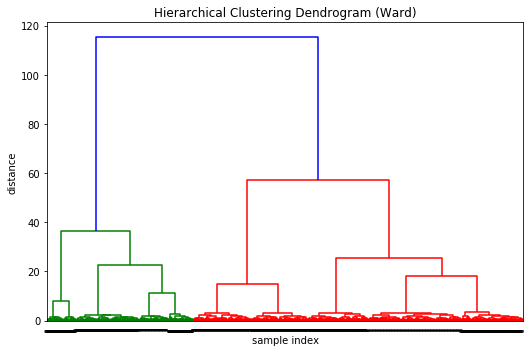

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Performs hierarchical/agglomerative clustering on X by using "Ward's method"
linkage_matrix = linkage(df_train2, 'ward')
figure = plt.figure(figsize=(7.5, 5))
# Plots the dendrogram
dendrogram(linkage_matrix, labels = agglomerativeClustering_labels)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()